# Study of markers in normal and pathological breast tissues

In [4]:
import scSherlock as sh
import scanpy as sc

In [5]:
adata = sc.read_h5ad('/home/croizer/Downloads/HBCA_reed_2024.h5ad')
cell_type_column = "author_cell_type"
patient_column = "donor_id"


In [6]:
adata.obs

,mapped_reference_assembly,mapped_reference_annotation,alignment_software,donor_id,self_reported_ethnicity_ontology_term_id,donor_living_at_sample_collection,donor_menopausal_status,organism_ontology_term_id,sample_uuid,sample_preservation_method,...,reported_diseases,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
r1_hbca_c01_AACCATGGTATGCTTG,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,<!&Xml@2U3
r1_hbca_c01_ACGGAGACAAGCTGTT,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,!^*casZX*i
r1_hbca_c01_ACTGATGGTCATCGGC,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,tLtNkuoh!2
r1_hbca_c01_AGGTCATGTGCACCAC,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,p{<t;?E>p1
r1_hbca_c01_CAGCCGAAGATATGCA,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P01,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,c4a63080-974c-4eb1-9c40-7c6f93f65de6,n/a (fresh),...,breast cancer,luminal epithelial cell of mammary gland,10x 3' v2,normal,Homo sapiens,female,breast,European,adult stage,6e?5{$)A$p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hbca_c150_hbca_c150_TTTATGCCACAATGTC-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,pericyte,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,9n<A?*kjwJ
hbca_c150_hbca_c150_TTTCCTCAGGTATTGA-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,vascular associated smooth muscle cell,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,_pa>;Lk*+Q
hbca_c150_hbca_c150_TTTGATCGTGTTACAC-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,pericyte,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,9e7S$O8Qm)
hbca_c150_hbca_c150_TTTGATCTCGAGAGAC-1,GRCh38,GENCODE 28,Cell Ranger count v3.1.0,P109,HANCESTRO:0005,True,postmenopausal,NCBITaxon:9606,6eb56453-fb44-4f95-8380-9022862638b3,n/a (fresh),...,none,vascular associated smooth muscle cell,10x 3' v3,normal,Homo sapiens,female,breast,European,adult stage,ESyjcHR5cG


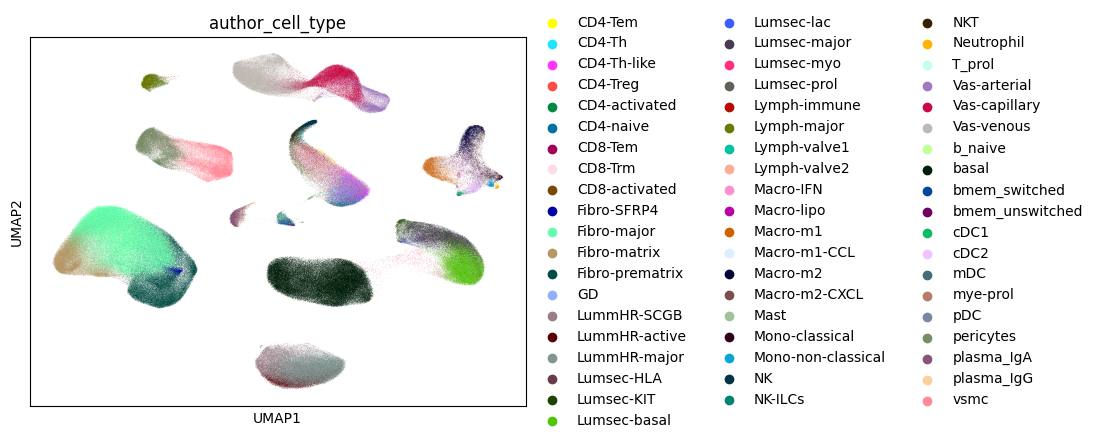

In [7]:
sc.pl.umap(adata, color="author_cell_type")

In [8]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=20,
    n_jobs=20
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)



2025-03-24 16:32:17,113 - ScSherlock - INFO - Pre-filtering genes...
2025-03-24 16:32:17,115 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (714331, 33145) data matrix


In [9]:
# Run the algorithm
top_markers = scherlock.run(method="theoric")
#top_markers = scherlock.run(method="empiric")


2025-03-24 16:32:17,120 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|██████████| 7308/7308 [00:03<00:00, 2318.65it/s]
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:496: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
/home/croizer/Documents/02_Analysis/02_scSherlock/scSherlock/scSherlock/scSherlock/sherlock_obj.py:504: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (n_cells.drop(ctype).groupby(level=self.column_patient).sum())).median()
/ho

{'LummHR-SCGB':                    1   10            25    aggregated  exp_prop
ENSG00000145451  1.0  1.0  1.000000e+00  1.000000e+00  0.000021
ENSG00000121270  1.0  1.0  1.000000e+00  1.000000e+00  0.000009
ENSG00000268751  1.0  1.0  1.000000e+00  1.000000e+00  0.000009
ENSG00000170099  1.0  1.0  1.000000e+00  1.000000e+00  0.000004
ENSG00000213759  1.0  1.0  1.000000e+00  1.000000e+00  0.000003
...              ...  ...           ...           ...       ...
ENSG00000198668  0.0  0.0 -1.826196e-15 -6.087319e-16  0.000412
ENSG00000204592  0.0  0.0 -2.091650e-15 -6.972167e-16  0.000324
ENSG00000146278  0.0  0.0 -4.057561e-15 -1.352520e-15  0.000308
ENSG00000100097  0.0  0.0 -1.912242e-14 -6.374141e-15  0.000137
ENSG00000026025  0.0  0.0 -2.936841e-06 -9.789472e-07  0.000129

[33145 rows x 5 columns], 'LummHR-major':                    1   10            25    aggregated  exp_prop
ENSG00000145113  1.0  1.0  1.000000e+00  1.000000e+00  0.000011
ENSG00000170743  1.0  1.0  1.000000e+00  1.00

In [ ]:
adata.var_names = adata.var['feature_name']

Index(['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092',
       'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906',
       'ENSG00000241599', 'ENSG00000236601', 'ENSG00000284733',
       'ENSG00000235146',
       ...
       'ENSG00000277196', 'ENSG00000277630', 'ENSG00000278384',
       'ENSG00000278633', 'ENSG00000276345', 'ENSG00000277856',
       'ENSG00000275063', 'ENSG00000271254', 'ENSG00000277475',
       'ENSG00000268674'],
      dtype='object', length=33145)

In [15]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000243485,False,MIR1302-2HG,NCBITaxon:9606,gene,623,lncRNA
ENSG00000237613,False,FAM138A,NCBITaxon:9606,gene,888,lncRNA
ENSG00000186092,False,OR4F5,NCBITaxon:9606,gene,2618,protein_coding
ENSG00000238009,False,ENSG00000238009.6,NCBITaxon:9606,gene,629,lncRNA
ENSG00000239945,False,ENSG00000239945.1,NCBITaxon:9606,gene,1319,lncRNA
...,...,...,...,...,...,...
ENSG00000277856,False,ENSG00000277856.1,NCBITaxon:9606,gene,294,protein_coding
ENSG00000275063,False,ENSG00000275063.1,NCBITaxon:9606,gene,351,protein_coding
ENSG00000271254,False,ENSG00000271254.7,NCBITaxon:9606,gene,2922,protein_coding
ENSG00000277475,False,ENSG00000277475.1,NCBITaxon:9606,gene,831,protein_coding


2025-03-24 16:34:04,734 - ScSherlock - INFO - Plotting 58 genes for 58 cell types using theoric model


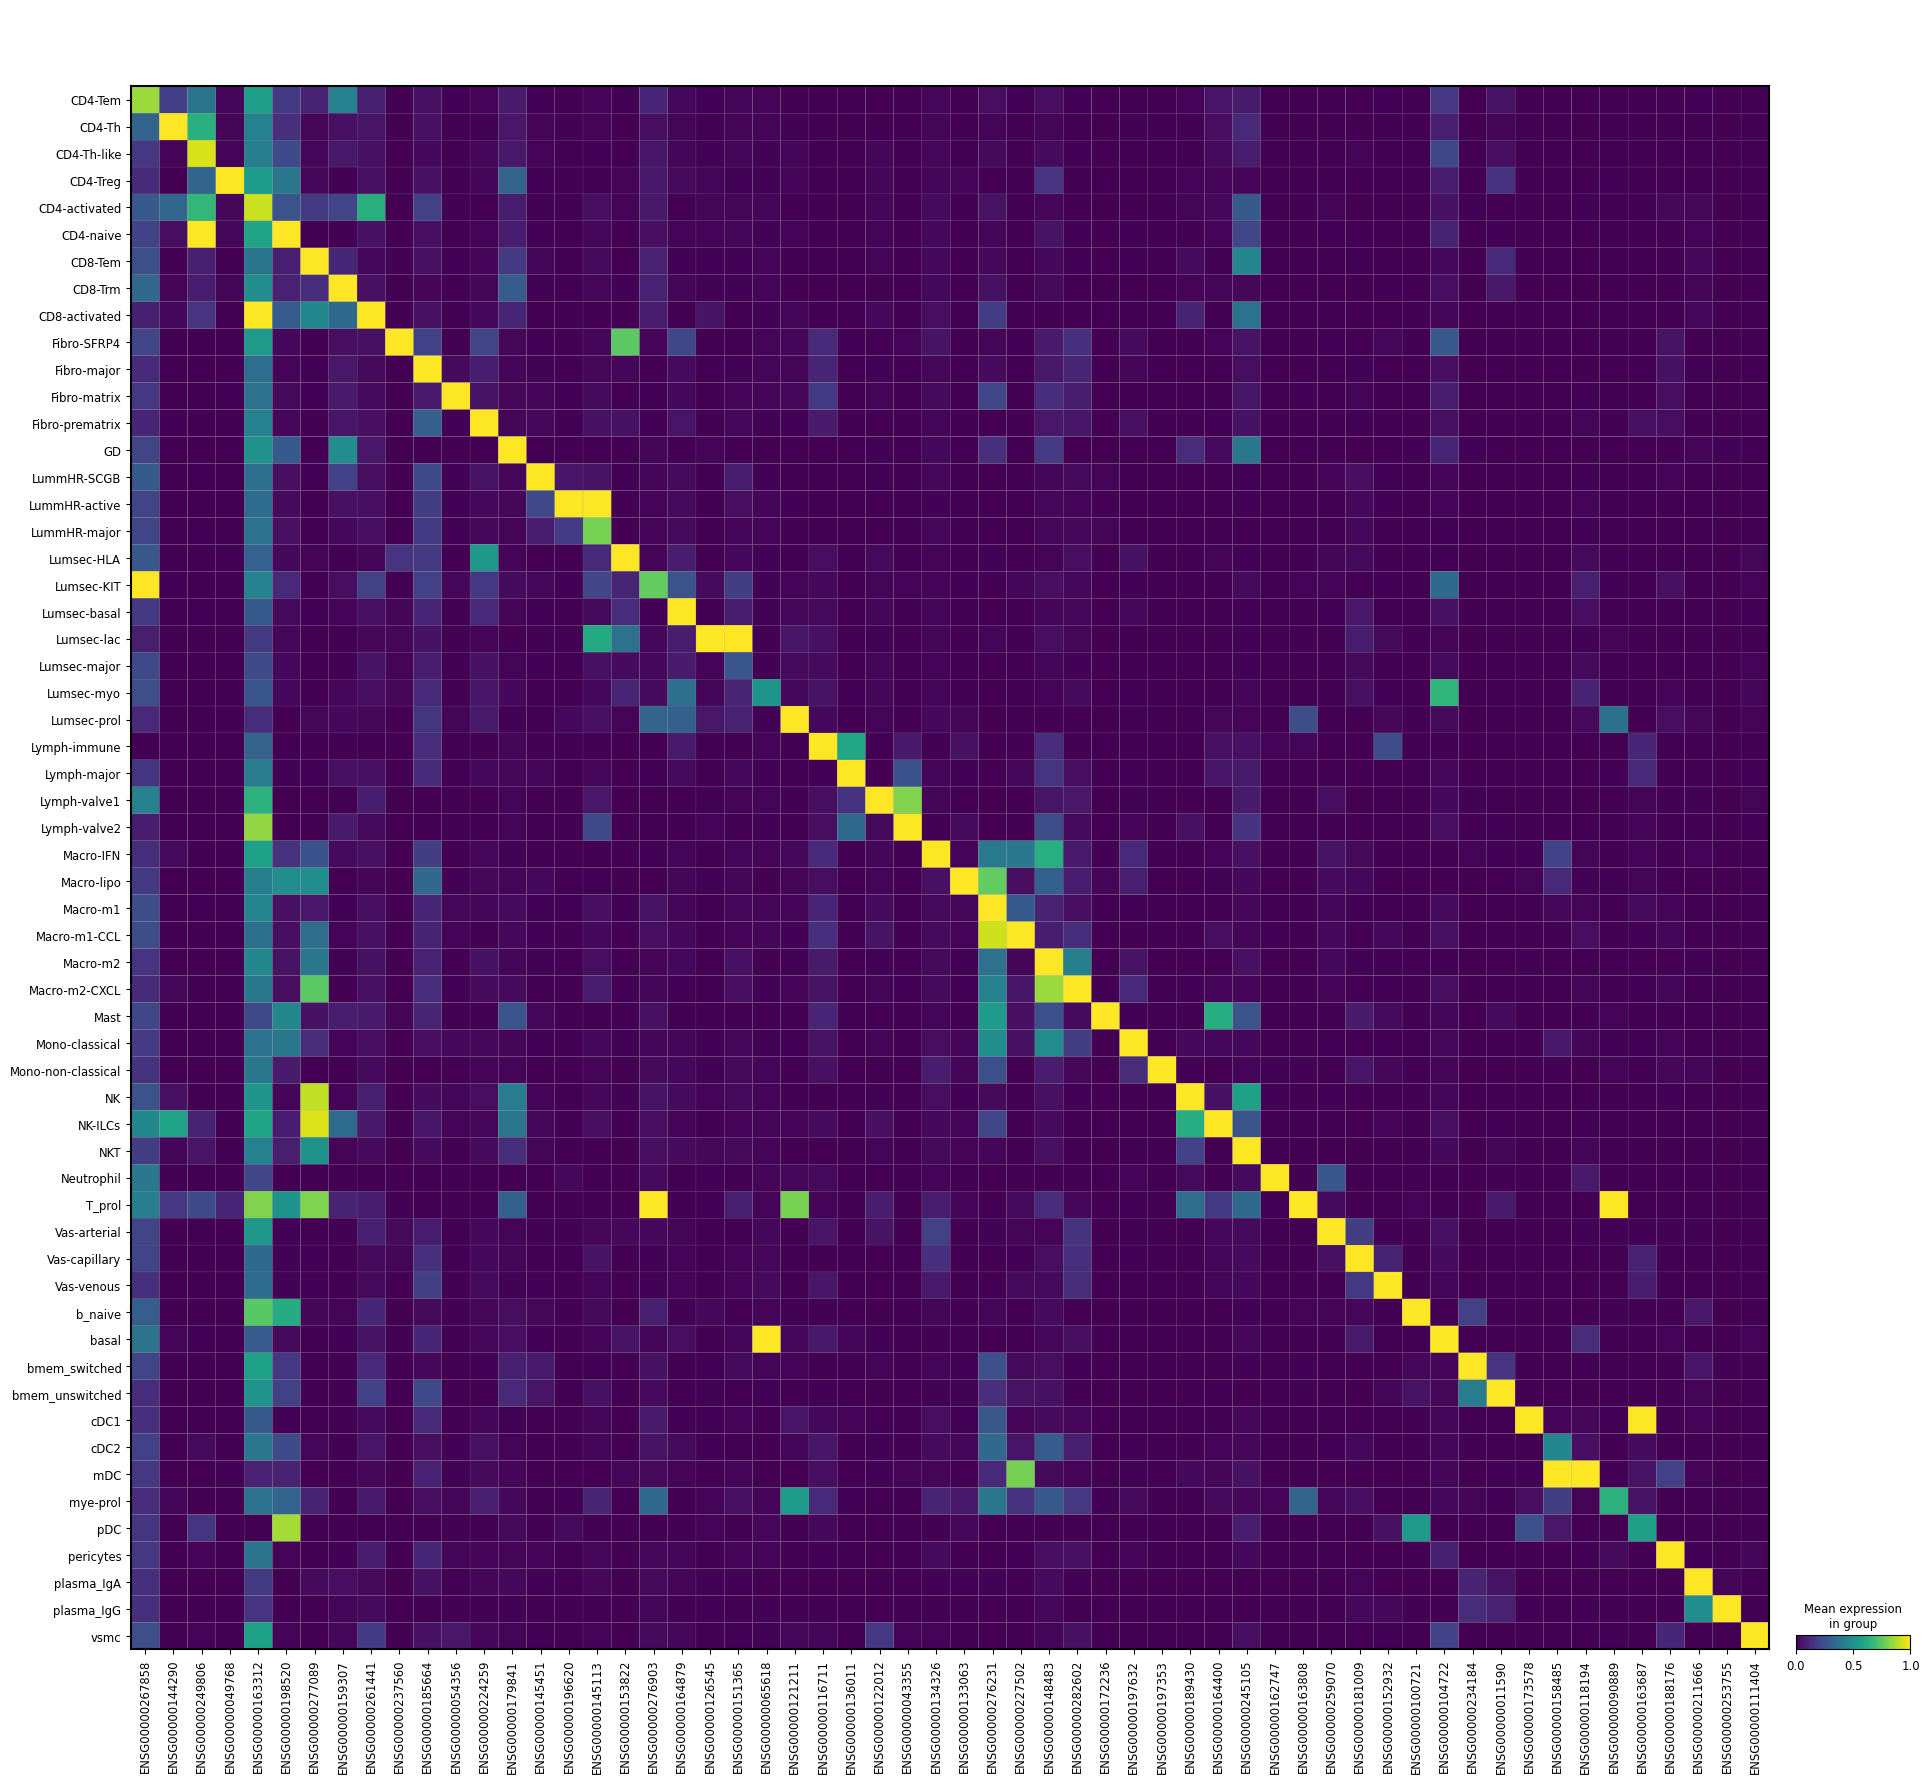

In [10]:
scherlock.plot_marker_heatmap(n_genes=1)